In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install plotly

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as pt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
%matplotlib inline

In [ ]:
df =  pd.read_csv("/content/zomato.csv")
pd.set_option('display.max_columns',None)
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
df.shape

(9551, 21)

In [ ]:
nan_values = df.isna()
nan_columns = nan_values.any()

columns_with_nan = df.columns[nan_columns].tolist()
print(columns_with_nan)

['Cuisines']


In [ ]:
df1 = pd.read_excel('/content/Country-Code.xlsx')
df1.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [ ]:
df2 = pd.merge(df,df1,on='Country Code',how='left')
df2.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [ ]:
print('List of counteris the survey is spread accross - ')
for x in pd.unique(df2.Country): print(x)
print()
print('Total number to country', len(pd.unique(df2.Country)))

List of counteris the survey is spread accross - 
Phillipines
Brazil
United States
Australia
Canada
Singapore
UAE
India
Indonesia
New Zealand
United Kingdom
Qatar
South Africa
Sri Lanka
Turkey

Total number to country 15


In [ ]:
df1 = df.groupby(['Aggregate rating','Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
df1

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


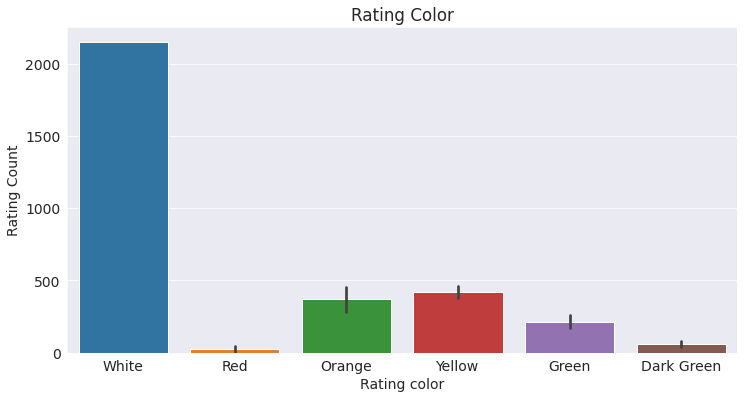

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

plt.figure(figsize=(12,6))
# plt.xticks(rotation=75)
plt.title('Rating Color')
sns.barplot(x=df1['Rating color'], y=df1['Rating Count']);

In [ ]:
No_rating = df2[df2['Rating color']=='White'].groupby('Country').size().reset_index().rename(columns={0:'Rating Count'})
No_rating

,Country,Rating Count
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


In [ ]:
country_currency = df2[['Country','Currency']].groupby(['Country','Currency']).size().reset_index(name='count').drop('count', axis=1, inplace=False)
country_currency.sort_values('Currency').reset_index(drop=True)

,Country,Currency
0,Phillipines,Botswana Pula(P)
1,Brazil,Brazilian Real(R$)
2,Australia,Dollar($)
3,Canada,Dollar($)
4,Singapore,Dollar($)
5,United States,Dollar($)
6,UAE,Emirati Diram(AED)
7,India,Indian Rupees(Rs.)
8,Indonesia,Indonesian Rupiah(IDR)
9,New Zealand,NewZealand($)


In [ ]:
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
plt.figure(figsize=(12,6))
# import plotly.plotly as py

labels = list(df.Currency.value_counts().head(20).index)
values = list(df.Currency.value_counts().head(20).values)

fig = {
    "data":[
        {
            "labels" : labels,
            "values" : values,
            "hoverinfo" : 'label+percent',
            "domain": {"x": [0, .9]},
            "hole" : 0.5,
            "type" : "pie",
            "rotation":120,
        },
    ],
    "layout": {
        "title" : "Zomato's Presence Currency wise",
        "annotations": [
            {
                "font": {"size":20},
                "showarrow": True,
                "text": "Cities",
                "x":0.2,
                "y":0.9,
            },
        ]
    }
}
iplot(fig);

<Figure size 864x432 with 0 Axes>

In [ ]:
from plotly.offline import init_notebook_mode, plot, iplot

labels = list(df2.Country.value_counts().index)
values = list(df2.Country.value_counts().values)

fig = {
    "data":[
        {
            "labels" : labels,
            "values" : values,
            "hoverinfo" : 'label+percent',
            "domain": {"x": [0, .9]},
            "hole" : 0.6,
            "type" : "pie",
            "rotation":120,
        },
    ],
    "layout": {
        "title" : "Zomato's Presence around the World",
        "annotations": [
            {
                "font": {"size":20},
                "showarrow": True,
                "text": "Countries",
                "x":0.2,
                "y":0.9,
            },
        ]
    }
}

iplot(fig)

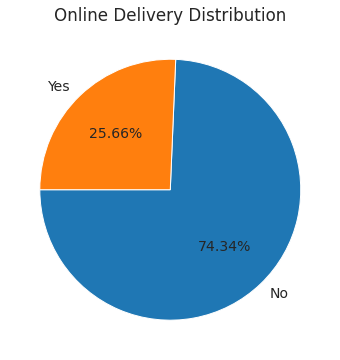

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Online Delivery Distribution')
plt.pie(df['Has Online delivery'].value_counts()/9551*100, labels=df['Has Online delivery'].value_counts().index, autopct='%1.2f%%', startangle=180);

In [ ]:
import ipywidgets as widgets
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

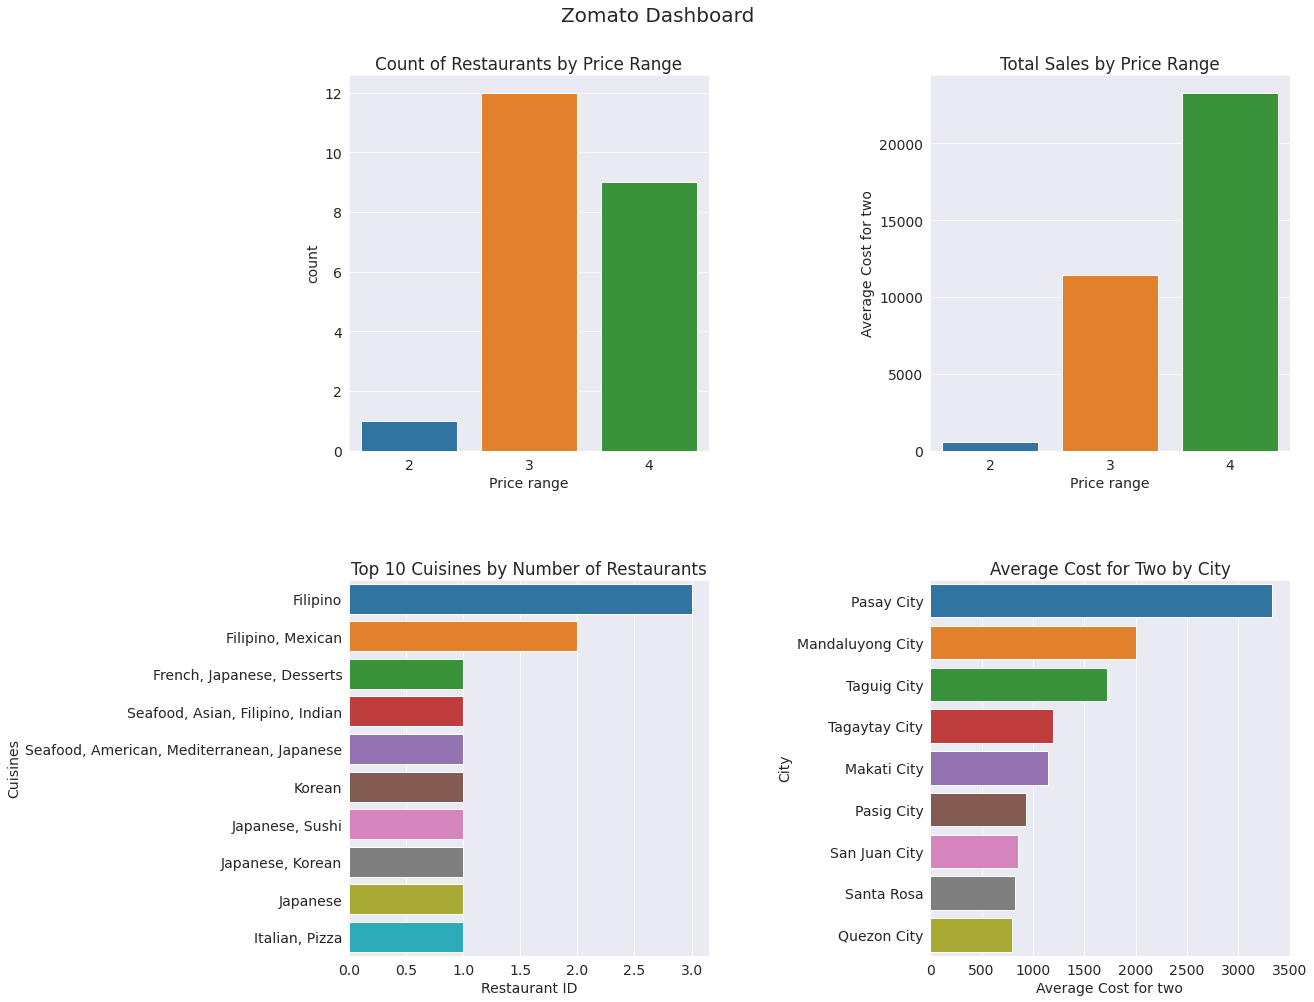

In [ ]:
# Create the figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 15))

# Dropdown to choose country-specific data
countries = df2['Country'].unique()
country_dropdown = widgets.Dropdown(options=countries)

# Function to update the charts when a country is selected
def update_charts(*args):
    # Filter the data based on the selected country
    filtered_data = df2[df2['Country'] == country_dropdown.value]

    # Count of restaurants by price range
    sns.countplot(x='Price range', data=filtered_data, ax=axs[0, 0])
    axs[0, 0].set_title('Count of Restaurants by Price Range')

    # Total sales by price range
    sales_data = filtered_data.groupby('Price range')['Average Cost for two'].sum().reset_index()
    sns.barplot(x='Price range', y='Average Cost for two', data=sales_data, ax=axs[0, 1])
    axs[0, 1].set_title('Total Sales by Price Range')

    # Top 10 cuisines by number of restaurants
    cuisine_data = filtered_data.groupby('Cuisines')['Restaurant ID'].count().reset_index()
    cuisine_data = cuisine_data.sort_values('Restaurant ID', ascending=False)[:10]
    sns.barplot(x='Restaurant ID', y='Cuisines', data=cuisine_data, ax=axs[1, 0])
    axs[1, 0].set_title('Top 10 Cuisines by Number of Restaurants')

    # Average cost for two by city
    city_data = filtered_data.groupby('City')['Average Cost for two'].mean().reset_index()
    city_data = city_data.sort_values('Average Cost for two', ascending=False)[:20]
    sns.barplot(x='Average Cost for two', y='City', data=city_data, ax=axs[1, 1])
    axs[1, 1].set_title('Average Cost for Two by City')

# Call the function to update the charts with the default value
update_charts()

# Set the callback function for the dropdown
country_dropdown.observe(update_charts, 'value')

# Add the dropdown to the figure
plt.subplots_adjust(top=0.9)
fig.suptitle('Zomato Dashboard', fontsize=20)
fig.tight_layout(pad=5)
fig.show()


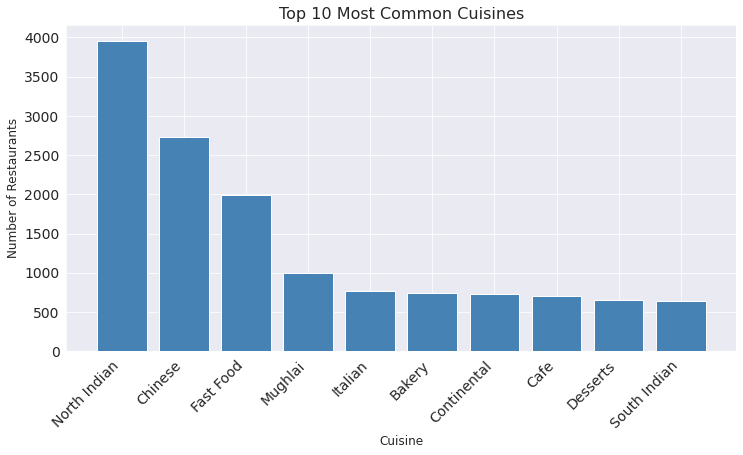

In [ ]:
# Count the number of occurrences of each cuisine
cuisine_counts = df2['Cuisines'].str.split(', ').explode().value_counts()[:10]

# Plot a bar chart of the top 10 most common cuisines
plt.figure(figsize=(12,6))
plt.bar(cuisine_counts.index, cuisine_counts.values, color='steelblue')
plt.title("Top 10 Most Common Cuisines", fontsize=16)
plt.xlabel("Cuisine", fontsize=12)
plt.ylabel("Number of Restaurants", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()


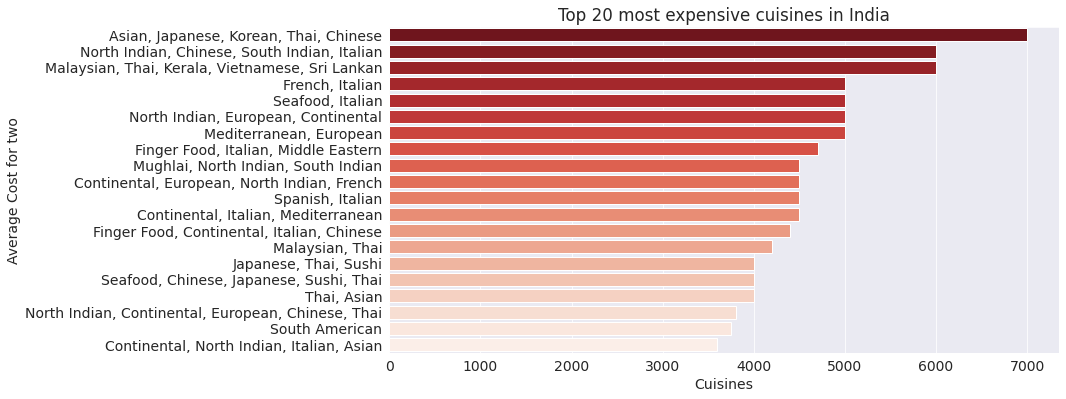

In [ ]:
# Filter the data for India
india_data = df2[df2["Country"] == "India"]

# Group the data by cuisine and calculate the mean of the average cost for two
cuisine_cost = india_data.groupby("Cuisines")["Average Cost for two"].mean().reset_index()

# Sort the data in descending order by cost
cuisine_cost = cuisine_cost.sort_values(by="Average Cost for two", ascending=False)

# Take the top 20 most expensive cuisines
top_cuisines = cuisine_cost.head(20)

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x="Average Cost for two", y="Cuisines", data=top_cuisines, palette="Reds_r")
plt.xlabel("Cuisines")
plt.ylabel("Average Cost for two")
plt.title("Top 20 most expensive cuisines in India")
plt.show()



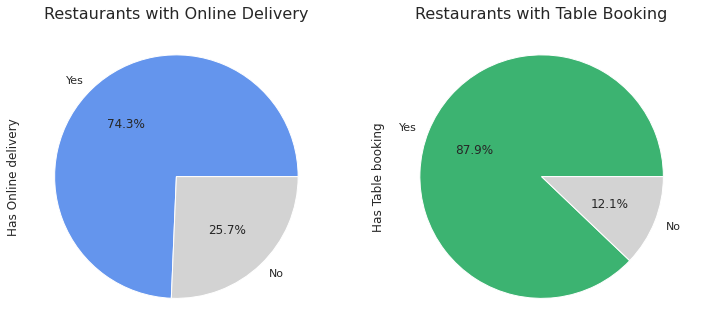

In [ ]:
delivery_count = df['Has Online delivery'].value_counts()
table_booking_count = df['Has Table booking'].value_counts()

# Create a pie chart of the percentage of restaurants with online delivery and table booking
fig, ax = plt.subplots(1,2, figsize=(12,6))
delivery_count.plot.pie(ax=ax[0], autopct='%1.1f%%', labels=['Yes', 'No'], colors=['cornflowerblue', 'lightgrey'])
ax[0].set_title("Restaurants with Online Delivery", fontsize=16)
table_booking_count.plot.pie(ax=ax[1], autopct='%1.1f%%', labels=['Yes', 'No'], colors=['mediumseagreen', 'lightgrey'])
ax[1].set_title("Restaurants with Table Booking", fontsize=16)
plt.show()

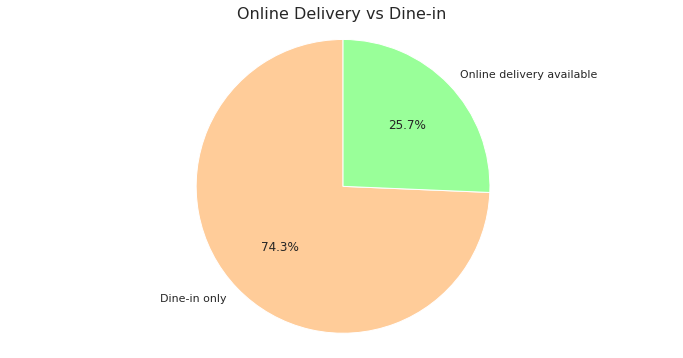

In [ ]:
delivery = df2['Has Online delivery'].value_counts()
labels = ['Dine-in only', 'Online delivery available']

plt.pie(delivery, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ffcc99', '#99ff99'])
plt.title('Online Delivery vs Dine-in', fontsize=16)
plt.axis('equal')
plt.show()


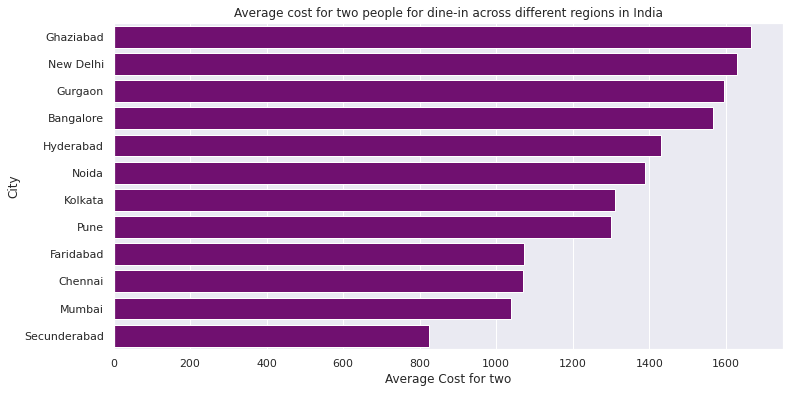

In [ ]:
# Filter the data for India only and for dine-in
india_data = df[df['Country Code'] == 1]
dinein_data = india_data[india_data['Has Table booking'] == 'Yes']

# Calculate the average cost for two people for dine-in in each region
region_cost = dinein_data.groupby('City')['Average Cost for two'].mean().reset_index()
region_cost = region_cost.sort_values('Average Cost for two', ascending=False)

# Plot the bar chart
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(12,6)})
sns.barplot(x="Average Cost for two", y="City", data=region_cost, color='purple')
plt.title("Average cost for two people for dine-in across different regions in India")
plt.show()


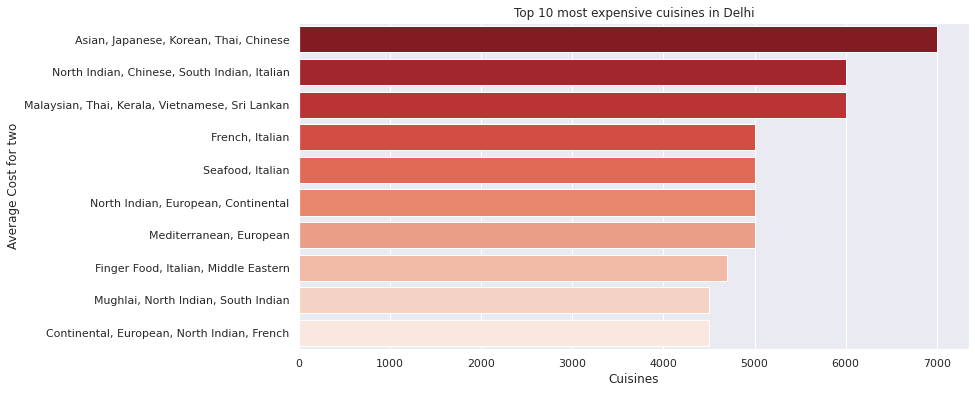

In [ ]:
# Filter the data for India
city_data = df2[df2["City"] == "Delhi"]

# Group the data by cuisine and calculate the mean of the average cost for two
city_cost = city_data.groupby("Cuisines")["Average Cost for two"].mean().reset_index()

# Sort the data in descending order by cost
city_cost1 = cuisine_cost.sort_values(by="Average Cost for two", ascending=False)

# Take the top 20 most expensive cuisines
top_cuisines1 = city_cost.head(20)

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x="Average Cost for two", y="Cuisines", data=top_cuisines, palette="Reds_r")
plt.xlabel("Cuisines")
plt.ylabel("Average Cost for two")
plt.title("Top 10 most expensive cuisines in Delhi")
plt.show()

